In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels

**Plotting first 64 images**

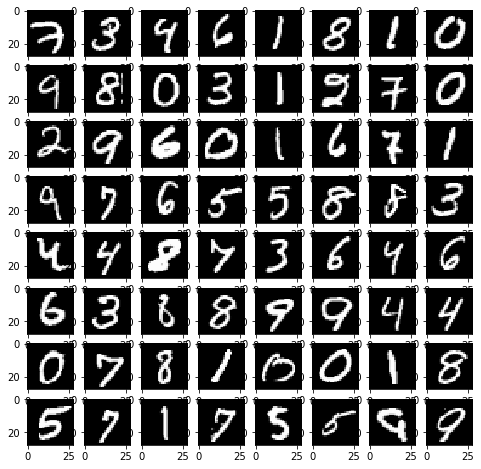

In [4]:
import matplotlib.pyplot as plt
images_train = mnist.train.images.reshape(55000,28,28)
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap = 'gray')
plt.show()

**CNN Implementation**

In [0]:
input_height = 28
input_width = 28
input_channels = 1
pixels = 784

conv1_units = 32
conv1_stride = 1
conv1_filter = 5
conv2_units = 64
conv2_stride = 1
conv2_filter = 5

pool1_filter = 2
pool2_filter = 2

pool2_output_dimension = (input_height//(pool1_filter*pool2_filter)) * (input_width//(pool1_filter*pool2_filter)) * conv2_units 
hidden_units = 1024
output_units = 10


In [0]:
weights = {
    'conv1': tf.Variable(tf.random_normal([conv1_filter,conv1_filter,input_channels,conv1_units])),
    'conv2': tf.Variable(tf.random_normal([conv2_filter,conv2_filter,conv1_units,conv2_units])),
    'hidden': tf.Variable(tf.random_normal([pool2_output_dimension,hidden_units])),
    'out': tf.Variable(tf.random_normal([hidden_units,output_units]))
}

biases = {
    'conv1':tf.Variable(tf.random_normal([conv1_units])),
    'conv2':tf.Variable(tf.random_normal([conv2_units])),
    'hidden':tf.Variable(tf.random_normal([hidden_units])),
    'out':tf.Variable(tf.random_normal([output_units]))
}

In [0]:
def conv(X,weight,bias,stride):
  conv_input = tf.nn.conv2d(X,weight,padding='SAME',strides=[1,stride,stride,1])
  conv_input = tf.nn.bias_add(conv_input,bias)
  conv_output = tf.nn.relu(conv_input)
  return conv_output

In [0]:
def pool(X,filter_size):
  return tf.nn.max_pool(X,ksize =[1,filter_size,filter_size,1],padding = 'SAME', strides = [1,filter_size,filter_size,1] )

In [0]:
def forward_propagation(X,weights,biases,p):
  X = tf.reshape(X,shape = [-1,input_height,input_width,input_channels])

  conv1_output = conv(X,weights['conv1'],biases['conv1'],conv1_stride)
  pool1_output = pool(conv1_output,pool1_filter) 

  conv2_output = conv(pool1_output,weights['conv2'],biases['conv2'],conv2_stride)
  pool2_output = pool(conv2_output,pool2_filter) 

  nn_input = tf.reshape(pool2_output,shape = [-1,pool2_output_dimension])
  hidden_input = tf.add(tf.matmul(nn_input,weights['hidden']),biases['hidden'])
  hidden_output = tf.nn.dropout(tf.nn.relu(hidden_input),keep_prob=p)

  output_input = tf.add(tf.matmul(hidden_output,weights['out']),biases['out'])
  output_output = output_input # not using any activation function

  return output_output

In [10]:
X = tf.placeholder(tf.float32, shape = (None,pixels))
Y = tf.placeholder(tf.int32,shape = (None,output_units))
keep_prob = tf.placeholder(tf.float32)

Y_predicted = forward_propagation(X,weights,biases,keep_prob)

Y_true_classes = tf.arg_max(Y,1)
Y_predicted_classes = tf.arg_max(Y_predicted,1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Y_predicted,labels = Y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

**Execution**

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
sess.run(cost,feed_dict = {X:X_train,Y:Y_train,keep_prob:0.7})

87380.04

In [0]:
for i in range(100):
  batch_size = 100
  for j in range(550):
    sess.run(optimize,feed_dict={X:X_train[batch_size*j:batch_size*(j+1),:],Y:Y_train[batch_size*j:batch_size*(j+1),:],keep_prob:0.7})

In [16]:
sess.run(cost,feed_dict = {X:X_train,Y:Y_train,keep_prob:0.7})

0.3819806

In [0]:
y_pred = sess.run(Y_predicted_classes,feed_dict={X:X_test,Y:Y_test,keep_prob:1.0})
y_true = sess.run(Y_true_classes,feed_dict={Y:Y_test})

In [21]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

0.9849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



**Visualization of Testing Results**

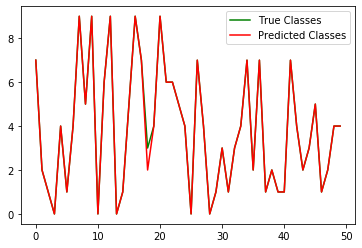

In [22]:
import numpy as np
x = np.arange(50)
plt.plot(x,y_true[0:50],'g',label='True Classes')
plt.plot(x,y_pred[0:50],'r',label='Predicted Classes')
plt.legend()
plt.show()